In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Global Variables

In [3]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Load datasets

In [5]:
hashmap = get_hashmap(path_to_module)
print(hashmap.keys())
dataset_name = "R3"
dataset_properties = hashmap[dataset_name]
print(dataset_properties)
batch_size = dataset_properties['batch_size'] #= 30
n_clusters = dataset_properties['n_clusters'] #= 3
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_properties)
print('Data_Shape is:', input_dim)
print('Batches Number is:', len(dataloader))

dict_keys(['10x73k', 'TCGA', 'coil20', 'eMNIST_balanced_letters', 'eMNIST_mnist', 'eMNIST_balanced_digits', 'Dermatology', 'Ecoil', 'Iris', 'Rings', 'Wine', 'Australian', 'Moons', 'Squeezed_Gauss', 'Gauss_Densities', 'Pendigits', 'fashionMNIST', '3DSpheres', '20_NewsGroups', 'COIL20', 'CIFAR10', 'STL10', 'R15', 'R3'])
{'batch_size': 100, 'n_clusters': 3, 'module_name': 'Datasets.Datasets', 'function_name': 'load_R3_dataloader', 'option_name': ''}
Data_Shape is: 2
Batches Number is: 15


### Parameters

In [6]:
# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']
n_clusters = dataset_properties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 100
entr_lambda = 1

kmeans_initialization = True

### Create MLP model

In [7]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

In [8]:
# Initialize the clustering layer using k-means
if kmeans_initialization : mlp.kmeans_initialization(10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58b2c80310>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58b2c80310>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


### Colors for visualization

In [9]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization()

### Training the MLP

In [19]:
data, labels, clustering = mlp.train()
cluster_centers = mlp.get_clustering_layer_centers().cpu().detach().numpy()
data_dir_path = mlp.data_dir_path

Epoch: 0 Cl Loss: 15.0054 Entropy: 23.7744 Soft Sil: -0.0054 SIL: 0.0000 ACC: 0.35 PUR: 0.35 NMI: 0.00 ARI: 0.00
Epoch: 1 Cl Loss: 15.0029 Entropy: 23.7744 Soft Sil: -0.0029 SIL: 0.0000 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 2 Cl Loss: 15.0012 Entropy: 23.7744 Soft Sil: -0.0012 SIL: 0.0000 ACC: 0.35 PUR: 0.35 NMI: 0.00 ARI: -0.00
Epoch: 3 Cl Loss: 15.0013 Entropy: 23.7744 Soft Sil: -0.0013 SIL: 0.0000 ACC: 0.38 PUR: 0.38 NMI: 0.01 ARI: 0.01
Epoch: 4 Cl Loss: 15.0011 Entropy: 23.7744 Soft Sil: -0.0011 SIL: 0.0000 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 5 Cl Loss: 15.0011 Entropy: 23.7744 Soft Sil: -0.0011 SIL: 0.0000 ACC: 0.42 PUR: 0.42 NMI: 0.02 ARI: 0.02
Epoch: 6 Cl Loss: 15.0010 Entropy: 23.7744 Soft Sil: -0.0010 SIL: 0.0000 ACC: 0.39 PUR: 0.39 NMI: 0.01 ARI: 0.01
Epoch: 7 Cl Loss: 15.0010 Entropy: 23.7744 Soft Sil: -0.0010 SIL: 0.0000 ACC: 0.38 PUR: 0.38 NMI: 0.02 ARI: 0.01
Epoch: 8 Cl Loss: 15.0010 Entropy: 23.7744 Soft Sil: -0.0010 SIL: 0.0000 ACC: 0.44 PUR: 0.44 NM

Epoch: 76 Cl Loss: 15.0011 Entropy: 23.7744 Soft Sil: -0.0011 SIL: 0.0000 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 77 Cl Loss: 15.0012 Entropy: 23.7744 Soft Sil: -0.0012 SIL: 0.0000 ACC: 0.38 PUR: 0.39 NMI: 0.01 ARI: 0.01
Epoch: 78 Cl Loss: 15.0007 Entropy: 23.7744 Soft Sil: -0.0007 SIL: 0.0000 ACC: 0.38 PUR: 0.39 NMI: 0.02 ARI: 0.01
Epoch: 79 Cl Loss: 15.0009 Entropy: 23.7744 Soft Sil: -0.0009 SIL: 0.0000 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 80 Cl Loss: 15.0011 Entropy: 23.7744 Soft Sil: -0.0011 SIL: 0.0000 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 81 Cl Loss: 15.0013 Entropy: 23.7744 Soft Sil: -0.0013 SIL: 0.0000 ACC: 0.38 PUR: 0.38 NMI: 0.01 ARI: 0.01
Epoch: 82 Cl Loss: 15.0012 Entropy: 23.7744 Soft Sil: -0.0012 SIL: 0.0000 ACC: 0.34 PUR: 0.34 NMI: 0.00 ARI: -0.00
Epoch: 83 Cl Loss: 15.0010 Entropy: 23.7744 Soft Sil: -0.0010 SIL: 0.0000 ACC: 0.35 PUR: 0.35 NMI: 0.00 ARI: -0.00
Epoch: 84 Cl Loss: 15.0010 Entropy: 23.7744 Soft Sil: -0.0010 SIL: 0.0000 ACC: 0.39 PU

### $k$-means evaluation

In [20]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f57a0610b80>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f57a27c7ac0>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(1.0, 1.0, 1.0, 1.0, 0)

/home/geo/Desktop/Soft-Silhouette/Visualization.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_centers[:n_clusters, 0], cluster_centers[:n_clusters, 1], c='red', marker='x', s=500, edgecolors='black', label='Cluster Centers')


Directory './Results/R3/MLP/100_Eps_out_3_bs_100_lr_0.001_entr_lambda_1/Experiments/No_TSNE' created successfully.


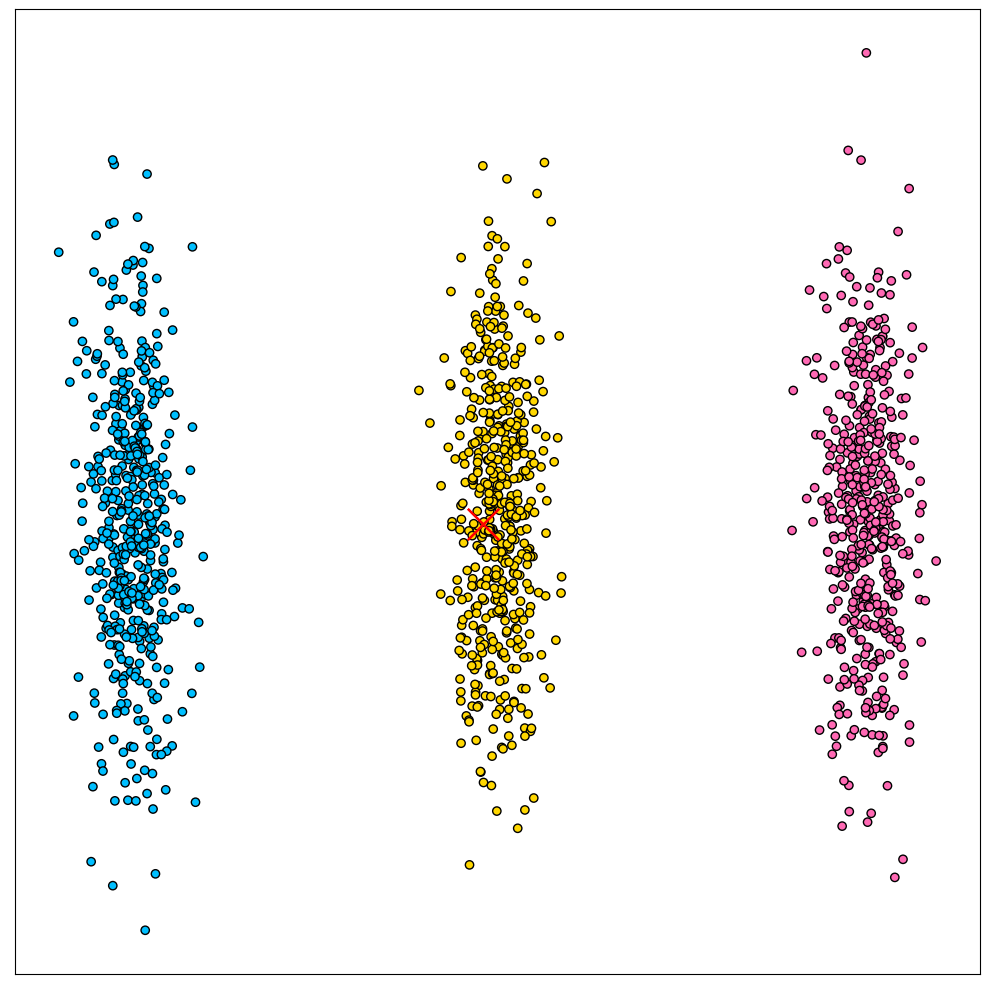

In [21]:
visualization.plot(data, labels, clustering, cluster_centers, mlp.data_dir_path)

In [ ]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)